In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
data = pd.read_csv("TCGA(1)/TCGA/dataset.csv")
outcome = pd.read_csv("TCGA(1)/TCGA/outcome.csv")

In [3]:
features = data.drop("Unnamed: 0", axis=1)
labels = outcome.drop("Unnamed: 0", axis=1)
labels = labels.dropna()

In [4]:
index = labels[labels['BRCA_subtype'].notna()].index
features = features.loc[index]

In [17]:
feature_list = list(features.columns)

## Decision Tree

In [6]:
# cross validation: DT
# common parameter(s) to tune: max_depth
accs = list()
for md in np.arange(6)+1:
    accs = list()
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = 42)

        clf = DecisionTreeClassifier(max_depth = md)
        clf.fit(X_train, y_train)

        test_preds = clf.predict(X_test)

        accs.append(accuracy_score(y_test, test_preds))

    print("{}:\t{}".format(md, np.round(np.mean(accs), 2)))

1:	0.59
2:	0.75
3:	0.81
4:	0.83
5:	0.84
6:	0.83
7:	0.82
8:	0.81
9:	0.81
10:	0.82


**Decision tree Optimal between 3 and 5**

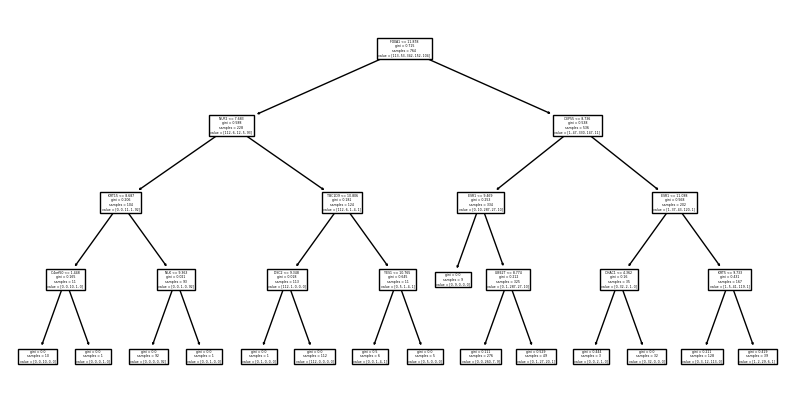

In [28]:
# DT (Decision tree): quick fit with default parameters 
accs = list()
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = 42)

    clf = DecisionTreeClassifier(max_depth = 4)
    clf.fit(X_train, y_train)

    test_preds = clf.predict(X_test)

    accs.append(accuracy_score(y_test, test_preds))

# visualizing the decision tree
plt.figure(figsize=(10,5))
plot_tree(clf, feature_names = features.columns, max_depth = 7)
plt.show()

In [29]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {:.3f}'.format(*pair)) for pair in feature_importances];

Variable: FOXA1                Importance: 0.280
Variable: NUF2                 Importance: 0.204
Variable: CEP55                Importance: 0.201
Variable: ESR1                 Importance: 0.119
Variable: KRT5                 Importance: 0.065
Variable: KRT15                Importance: 0.040
Variable: TBC1D9               Importance: 0.030
Variable: UBE2T                Importance: 0.028
Variable: CHAC1                Importance: 0.010
Variable: YES1                 Importance: 0.009
Variable: NLK                  Importance: 0.004
Variable: DSC2                 Importance: 0.004
Variable: C4orf50              Importance: 0.004
Variable: ARHGEF10L            Importance: 0.000
Variable: HIF3A                Importance: 0.000
Variable: RNF17                Importance: 0.000
Variable: RNF10                Importance: 0.000
Variable: RNF11                Importance: 0.000
Variable: RNF13                Importance: 0.000
Variable: GTF2IP1              Importance: 0.000
Variable: REM1      

## Random Forest

In [7]:
# cross validation: RF
# common parameter(s) to tune: max_depth and n_estimators
accs = list()
for md in np.arange(7)+1:
    accs = list()
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = 42)

        clf = RandomForestClassifier(max_depth = md, n_estimators = 100)
        clf.fit(X_train, np.array(y_train).ravel())

        test_preds = clf.predict(X_test)

        accs.append(accuracy_score(y_test, test_preds))

    print("{}:\t{}".format(md, np.round(np.mean(accs), 2)))

1:	0.6
2:	0.77
3:	0.81
4:	0.84
5:	0.84
6:	0.87
7:	0.85
8:	0.86
9:	0.87
10:	0.88


**RF Optimal between 4 and 6**

In [25]:
accs = list()
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = 42)

    clf = RandomForestClassifier(max_depth = 6, n_estimators = 100)
    clf.fit(X_train, np.array(y_train).ravel())

    test_preds = clf.predict(X_test)

    accs.append(accuracy_score(y_test, test_preds))

In [27]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {:.3f}'.format(*pair)) for pair in feature_importances];

Variable: FAM171A1             Importance: 0.007
Variable: TTK                  Importance: 0.006
Variable: AURKA                Importance: 0.006
Variable: SLC44A4              Importance: 0.006
Variable: NUF2                 Importance: 0.006
Variable: HJURP                Importance: 0.006
Variable: MICALL1              Importance: 0.006
Variable: KIF4A                Importance: 0.006
Variable: RGMA                 Importance: 0.006
Variable: GPR77                Importance: 0.005
Variable: TBC1D9               Importance: 0.005
Variable: VGLL1                Importance: 0.005
Variable: C6orf97              Importance: 0.004
Variable: ERGIC1               Importance: 0.004
Variable: ESR1                 Importance: 0.004
Variable: MELK                 Importance: 0.004
Variable: CDCA2                Importance: 0.004
Variable: DEPDC1B              Importance: 0.004
Variable: DMD                  Importance: 0.004
Variable: CENPA                Importance: 0.004
Variable: NCRNA00092

## K-nearest Neighbour

In [8]:
# cross validation: KNN
# common parameter(s) to tune: n_neighbors
accs = list()
for nb in np.arange(8)+1:
    accs = list()
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = 42)

        clf = KNeighborsClassifier(n_neighbors = nb)
        clf.fit(X_train, np.array(y_train).ravel())

        test_preds = clf.predict(X_test)

        accs.append(accuracy_score(y_test, test_preds))

    print("{}:\t{}".format(nb, np.round(np.mean(accs), 2)))

4:	0.8
5:	0.82
6:	0.82
7:	0.82
8:	0.82
9:	0.81
10:	0.83
11:	0.82
12:	0.81
13:	0.82


KeyboardInterrupt: 

**KNN Optimal between 4 and 5**

In [30]:
accs = list()
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = 42)

    clf = KNeighborsClassifier(n_neighbors = 5)
    clf.fit(X_train, np.array(y_train).ravel())

    test_preds = clf.predict(X_test)

    accs.append(accuracy_score(y_test, test_preds))

## Support Vector Machine

In [9]:
# cross validation: SVM (support vector machine)
# common parameter(s) to tune: kernel and C
accs = list()
for c in np.arange(1, 11)/10:
    accs = list()
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = 42)

        clf = SVC(kernel = 'linear', C = c)
        clf.fit(X_train, np.array(y_train).ravel())

        test_preds = clf.predict(X_test)

        accs.append(accuracy_score(y_test, test_preds))

    print("{}:\t{}".format(c, np.round(np.mean(accs), 2)))

0.1:	0.91
0.2:	0.91
0.3:	0.91
0.4:	0.9
0.5:	0.9
0.6:	0.91
0.7:	0.9


KeyboardInterrupt: 

**SVM All the same...**

In [43]:
accs = list()

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = 42)

    clf = SVC(kernel = 'linear', C = 0.1)
    clf.fit(X_train, np.array(y_train).ravel())

    test_preds = clf.predict(X_test)

    accs.append(accuracy_score(y_test, test_preds))
 

In [48]:
# Get numerical feature importances
importances = list(clf.coef_[0])
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {:.3f}'.format(*pair)) for pair in feature_importances];

Variable: MSLN                 Importance: 0.002
Variable: HORMAD1              Importance: 0.002
Variable: AMY1A                Importance: 0.002
Variable: CXCL5                Importance: 0.002
Variable: MAT1A                Importance: 0.002
Variable: OLFM4                Importance: 0.002
Variable: FBN3                 Importance: 0.002
Variable: SFRP1                Importance: 0.002
Variable: KRT6B                Importance: 0.002
Variable: BPI                  Importance: 0.002
Variable: GABRP                Importance: 0.001
Variable: GJB3                 Importance: 0.001
Variable: KRT5                 Importance: 0.001
Variable: C11orf86             Importance: 0.001
Variable: SMR3B                Importance: 0.001
Variable: CYP2B7P1             Importance: 0.001
Variable: COL2A1               Importance: 0.001
Variable: KCNS1                Importance: 0.001
Variable: MYO3B                Importance: 0.001
Variable: SAA2                 Importance: 0.001
Variable: PTPRZ1    